### Deadline 23.01.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<AxesSubplot:xlabel='x1', ylabel='x2'>

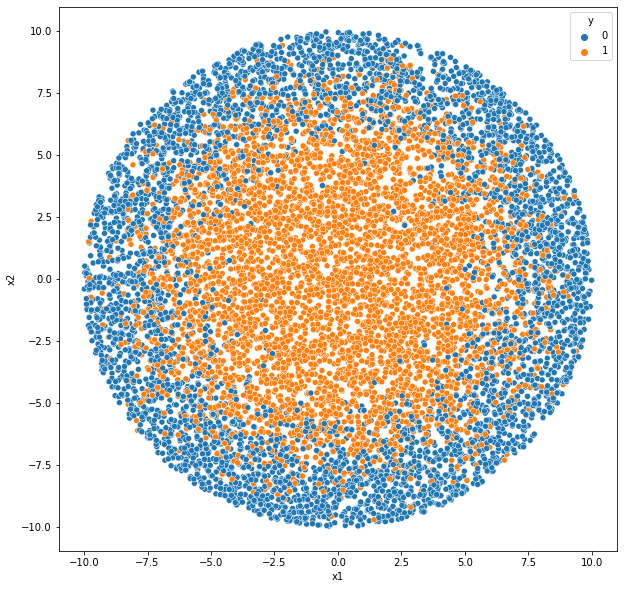

In [28]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

In [4]:
df.head()

,x1,x2,y
0,-4.626272,-6.658988,0
1,-7.789640,0.262519,0
2,-8.739678,1.537758,0
3,-2.546441,-7.705224,0
4,-2.751506,-7.940187,0


1) Идеальную модель построить скорее всего не получится, тк есть шумовые объекты.

2) После визуализации данных о выборке достаточно.

3) Судя по скатерплоту здесь подойдет только knn, либо при добавлении определенной фичи любой классификатор.

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

In [23]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)
predict_logit =  model.predict(X_test)
predict_log_proba = model.predict_log_proba(X_test).transpose()[1]

In [21]:
predict_log_proba.transpose()[1]

array([-0.64231046, -0.6525066 , -0.72456702, ..., -0.65848562,
       -0.68535698, -0.67250526])

In [20]:
model.classes_

array([0, 1], dtype=int64)

Точность нашей модели 0.5157575757575757


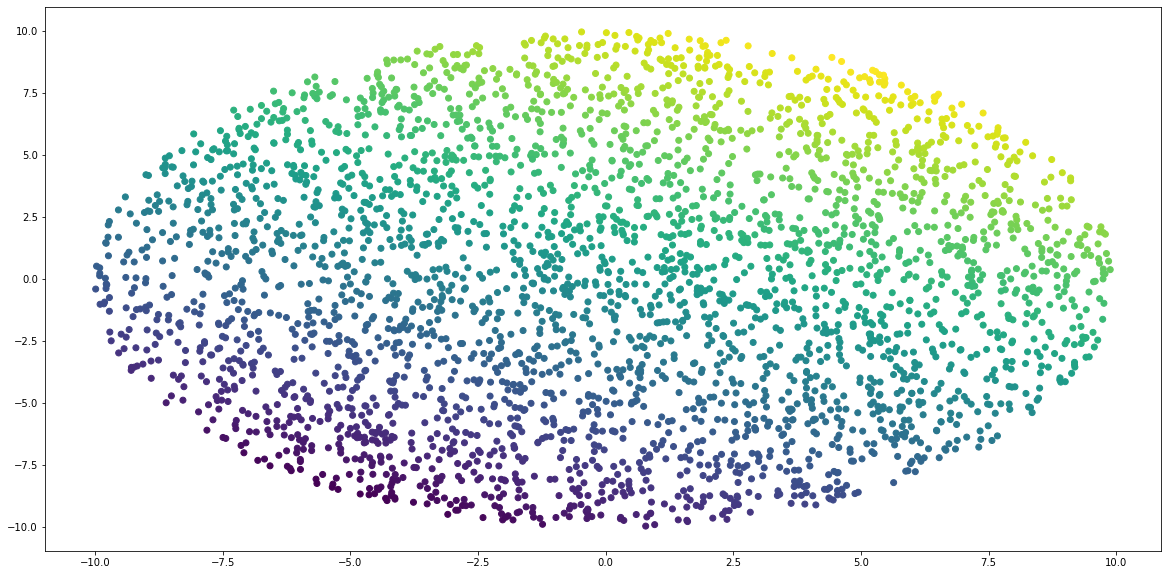

In [29]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)
predict_logit =  model.predict(X_test)
predict_log_proba = model.predict_log_proba(X_test).transpose()[1]


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Можно добавить фичу для расстояния от центра или что-то подобное.

In [65]:
df_new.head()

,x1,x2,y,new_feature_1
0,-4.626272,-6.658988,0,65.744514
1,-7.789640,0.262519,0,60.747406
2,-8.739678,1.537758,0,78.746664
3,-2.546441,-7.705224,0,65.854846
4,-2.751506,-7.940187,0,70.617354


Точность нашей модели 0.8263636363636364


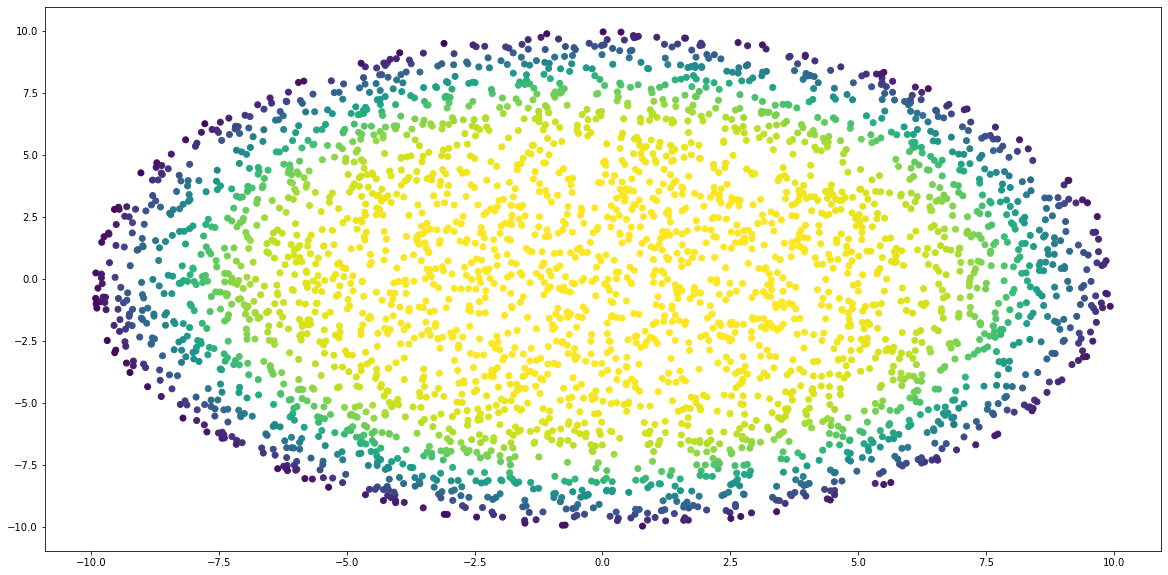

In [30]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df_new.x1 ** 2 + df_new.x2 ** 2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

model = LogisticRegression()
model.fit(X_train_new, y_train_new)
predict_logit =  model.predict(X_test_new)
predict_log_proba = model.predict_log_proba(X_test_new).transpose()[1]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Деревья склонны к переобучению. Можно зафиксировать min_samples_split и max_depth.

In [32]:
from sklearn.tree import DecisionTreeClassifier
? DecisionTreeClassifier

Точность нашей модели 0.816060606060606


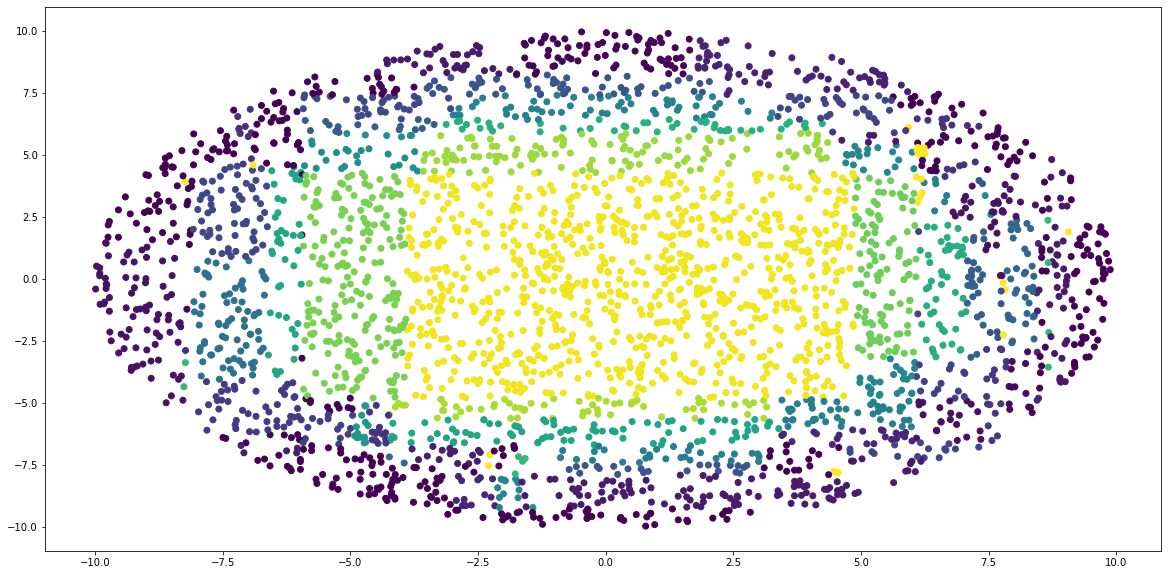

In [50]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код

model = DecisionTreeClassifier(max_depth=8, min_samples_split = 2)
model.fit(X_train, y_train)
predict_tree = model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = model.predict_proba(X_test).transpose()[1]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

На этих данных модели уже показали хороший результат. Не знаю, когда ансамбль дает хороший рез-т и поможет ли здесь, прошу объяснить.

In [66]:
from sklearn.ensemble import RandomForestClassifier
? RandomForestClassifier

Точность нашей модели 0.8242424242424242


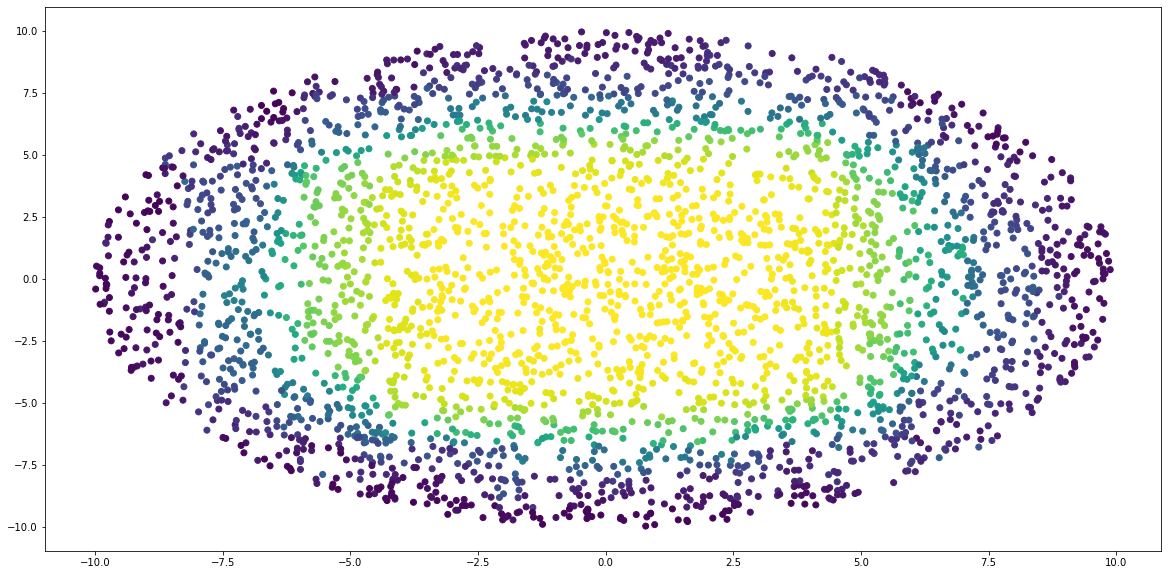

In [67]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

model = RandomForestClassifier(max_depth=8, min_samples_split = 2)
model.fit(X_train, y_train)
predict_forest = model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = model.predict_proba(X_test).transpose()[1]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [70]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы

2.9.1
2.9.0


In [85]:
from tensorflow.keras.metrics import Accuracy

def get_new_model( ):
    acc = Accuracy()

    ###########################################################
    # Ваш код! 
    model = Sequential(name = 'Archibald')  # модели можно дать имя!
    
    # Добавляем в нашу модель первый слой из 25 нейронов
    model.add(L.Dense(5, input_dim = X_train.shape[1], kernel_initializer='random_normal'))

    # Добавляем функцию активации на первый слой 
    model.add(L.Activation('sigmoid'))

    # Добавляем ещё один слой из 5 нейронов
    model.add(L.Dense(5, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    # На выходе мы должны получить вероятности того, что объект относится к разным классам 
    # Сделать такое преобразование позволяет softmax как функция активации
    # На выход будет идти 2 вероятности по числу классов
    model.add(L.Dense(2, activation='softmax', kernel_initializer = 'random_normal'))
    
    ###########################################################
    
    # В качестве оптимизации будем использовать Adam
    # Это такой специальный градиентный спуск, обсудим его в следущий раз
    optimizer = opt.Adam(learning_rate=1e-3)

    # Собираем модель
    model.compile(loss = 'categorical_crossentropy', 
                  metrics=['acc'], 
                  optimizer=optimizer)
    
    return model

In [87]:
model = get_new_model()
model.summary()

Model: "Archibald"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 activation_10 (Activation)  (None, 5)                 0         
                                                                 
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 activation_11 (Activation)  (None, 5)                 0         
                                                                 
 dense_17 (Dense)            (None, 2)                 12        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [94]:
from tensorflow.keras.utils import to_categorical
hist = model.fit(X_train, to_categorical(y_train), validation_split=0.2, epochs=30, verbose=1, batch_size=128)

Epoch 1/30
42/42 [==============================] - 0s 3ms/step - loss: 0.3774 - acc: 0.8343 - val_loss: 0.3681 - val_acc: 0.8418
Epoch 2/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3766 - acc: 0.8325 - val_loss: 0.3673 - val_acc: 0.8440
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3761 - acc: 0.8340 - val_loss: 0.3668 - val_acc: 0.8388
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3756 - acc: 0.8325 - val_loss: 0.3664 - val_acc: 0.8440
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3753 - acc: 0.8354 - val_loss: 0.3659 - val_acc: 0.8425
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3750 - acc: 0.8353 - val_loss: 0.3658 - val_acc: 0.8396
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3748 - acc: 0.8338 - val_loss: 0.3653 - val_acc: 0.8433
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3739 - acc: 0.83

104/104 [==============================] - 0s 1ms/step
Точность нашей модели 0.8212121212121212


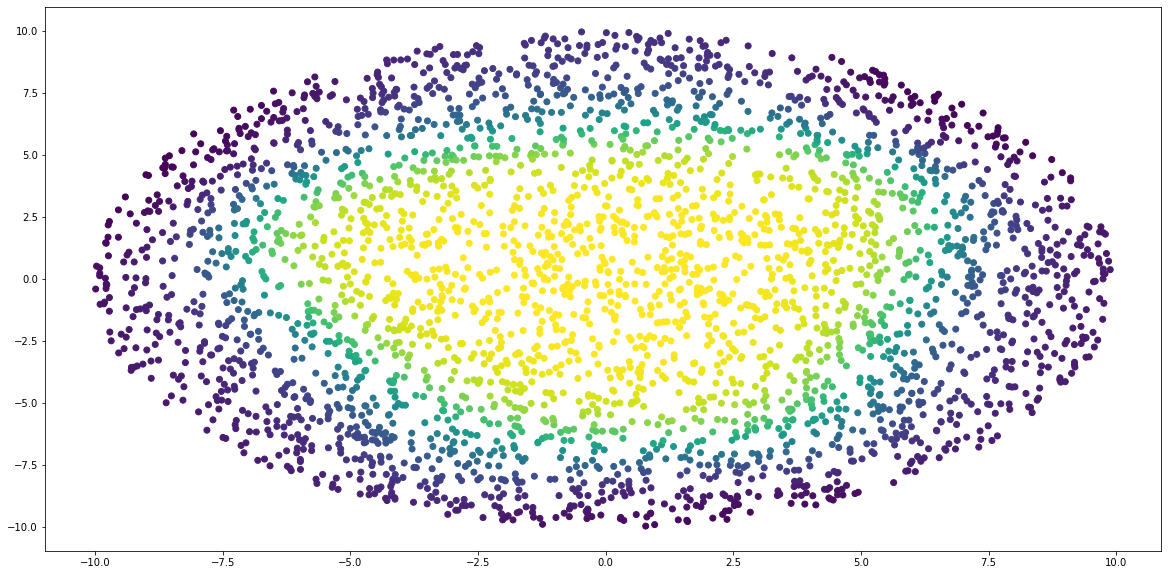

In [112]:
#########################################
# Ваш код

predict_neural = model.predict(X_test).transpose()[1]
predict_classes = tf.argmax(model.predict(X_test), axis=1)

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)